<a href="https://colab.research.google.com/github/paularedondosastre/APRENDIZAJE_AUTOMATICO_23_24/blob/main/Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1. Diseño, Entrenamiento y Test de un Sistema de Redes de Neuronas Artificiales
## Aprendizaje Automático
Grupo 3

Lucía Casas Sierra, Alba López Devesa, Paula Redondo Sastre

**Introducción...**

In [ ]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import utils
from keras.datasets import mnist

print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
GPU Available: []
2.13.0


Cargamos el conjunto de datos Fashion-MNIST en Keras

In [ ]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS MINIST EN KERAS

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

Comprobación de la forma de los datos...

In [ ]:
print(train_images.shape)

(60000, 28, 28)


**Construcción de la RNA**

...

In [ ]:
from keras import models
from keras import layers

# Creación de la lista con las cadenas model1, model2, ..., model8 que servirán
# para nombrar cada uno de los distintos modelos de estudio
cadena = ['model'] * 8
for i in range(8):
  cadena[i] = cadena[i] + str(i+1)

cont = 0

# Construcción
for n in [10, 512]:
  for act in ['relu', 'sigmoid']:
    for opt in ['sgd', 'rmsprop']:
      cadena[cont] = vars()
      cadena[cont] = models.Sequential()

      cadena[cont].add(layers.Dense(n, activation=act, input_shape=(28*28,)))
      cadena[cont].add(layers.Dense(10, activation = 'softmax'))

      cadena[cont].compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
      cont += 1

**Resumen de cada uno de los diferentes modelos**

...

In [ ]:
for i in range(8):
  print(f'\nResumen del modelo para los siguientes datos:\n{n} capas, función de activación {act}\n')
  cadena[i].summary()


Resumen del modelo para los siguientes datos:
512 capas, función de activación sigmoid

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                7850      
                                                                 
 dense_33 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Resumen del modelo para los siguientes datos:
512 capas, función de activación sigmoid

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 10)                7850      
                

**Preparación de los datos previa**

...

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))   # la neurona no acepta de entrada una matriz, sino un vector
print(train_images)
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[3000]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
60000
(60000, 784)
[[  0   0   0   0   0   0   0   0   1   1   0   0 120 131  91 147  30   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    3   0   0   0   0 251 199 172 195 152   0   0   0   0   3   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0  43 124 193 166 239
  255 216 172 228 126  61   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 167 155 159 171 178 211 215 210 196 189 158 164 159
  108   0   0   0   0   0   0   0   0   0   0   0   0  83 157 131 117 120 148 148 145 178 159 174 160 123 132 142 172  38   0   0   0   0   0
    0   0   0   0   0   0 159 128 118 120 122 112  93 124 161 109 128 128 129 146 138 167 122   0   0   0   0   0   0   0   0   0   0   0 171
  135 120 114 118 119 107 125 123 117 124 124 119 145 147 166 148   0   0   0   0   0   0   0   0   0   0   4 171 138 126 120 117 118 102 122
  145 111

In [ ]:
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[3000]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 60000,
 (60000, 784),
 array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.47, 0.51, 0.36, 0.58, 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.98, 0.78, 0.67, 0.76, 0.6 , 0.  ,
        0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.49, 0.76, 0.65,
        0.94, 1.  , 0.85, 0.67, 0.89, 0.49, 0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.38,
        0.65, 0.61, 0.62, 0.67, 0.7 , 0.83, 0.84, 0.82, 0.77, 0.74, 0.62, 0.64, 0.62, 0.42, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0

In [ ]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

**Entrenamiento de los sistemas**

...

In [ ]:
for i in range(8):
  print(f'\nEntrenamiento de la red neuronal para el modelo {i+1}\n')
  cadena[i].fit(train_images, train_labels, epochs=5, batch_size=128)
  test_loss, test_acc = cadena[i].evaluate(test_images, test_labels)
  print('test_loss:', test_loss)
  print('test_acc:', test_acc)


Entrenamiento de la red neuronal para el modelo 1

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 1.3979 - accuracy: 0.5486
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8168 - accuracy: 0.7424
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6851 - accuracy: 0.7774
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6218 - accuracy: 0.7939
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5908 - accuracy: 0.7993
test_loss: 0.5907770395278931
test_acc: 0.7993000149726868

Entrenamiento de la red neuronal para el modelo 2

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.9542 - accuracy: 0.6938
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5694 - accuracy: 0.8102
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5074 - accuracy: 0.8291
Epoch 4/5
469/469 [==========================

**Interpretación de los casos 2 y 7 al incrementar las épocas de entrenamiento**

...

In [ ]:
for i in [2, 7]:
  print(f'\nResultados para la red neuronal {i} con 25 épocas de entrenamiento\n')
  cadena[i-1].fit(train_images, train_labels, epochs=25, batch_size=128)


Resultados para la red neuronal 2 con 25 épocas de entrenamiento

Epoch 1/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4487 - accuracy: 0.8449
Epoch 2/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4388 - accuracy: 0.8480
Epoch 3/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4326 - accuracy: 0.8503
Epoch 4/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4268 - accuracy: 0.8502
Epoch 5/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4197 - accuracy: 0.8536
Epoch 6/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4119 - accuracy: 0.8556
Epoch 7/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4065 - accuracy: 0.8569
Epoch 8/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4015 - accuracy: 0.8597
Epoch 9/25
469/469 [==============================] - 2s 4ms/step - loss: 0.3970 - accuracy: 0.8607
Epoch 10/25
469/469 [============

**Predicciones sobre la sexta imagen**

...

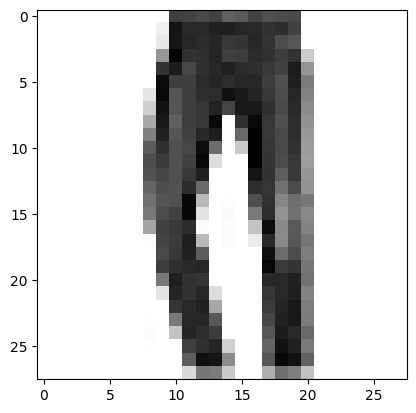

In [ ]:
(train_img, train_lbl), (test_img, test_lbl) = tf.keras.datasets.fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_img[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

print(f"Etiqueta original que le corresponde a la imagen 6:\n{test_labels[5]}")

# Hacemos las predicciones con las imágenes de Test
for i in range(8):
  predictions = cadena[i].predict(test_images)

  print(f"\nRed neuronal número {i+1}\n")
  print("\n=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============\n")
  print(np.argmax(predictions[5]))
  print("=======================================================================")
  print("\n=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===\n")
  print(np.sum(predictions[5]))

Etiqueta original que le corresponde a la imagen 6:
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
313/313 [==============================] - 0s 1ms/step

Red neuronal número 1


=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============

5

=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===

0.99999994
313/313 [==============================] - 0s 1ms/step

Red neuronal número 2


=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============

5

=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===

0.99999994
313/313 [==============================] - 1s 2ms/step

Red neuronal número 3


=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============

5

=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===

1.0
313/313 [==============================] - 1s 2ms/step

Red neuronal número 4


=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============

5

=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 

**Ejercicio 6**

...

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.yticks([])
  plt.xticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


Aplicación de las funciones

ESTO HAY QUE MIRARLO PORQUE NO ESTÁ TERMINADO Y NO SÉ SI ESTÁ BIEN

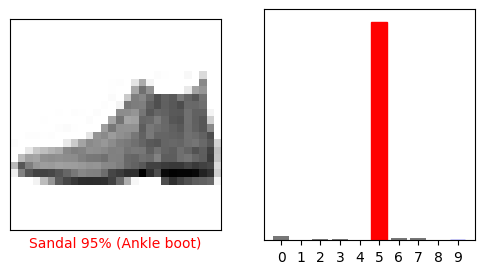

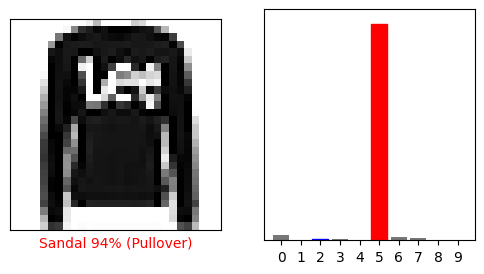

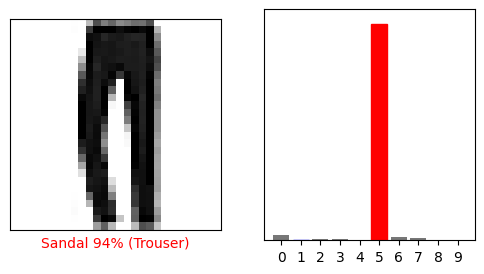

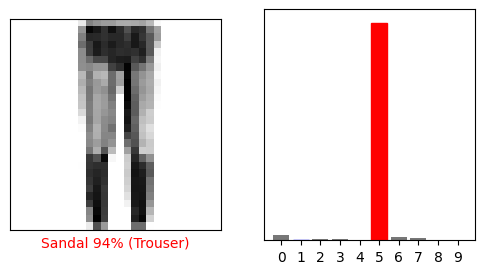

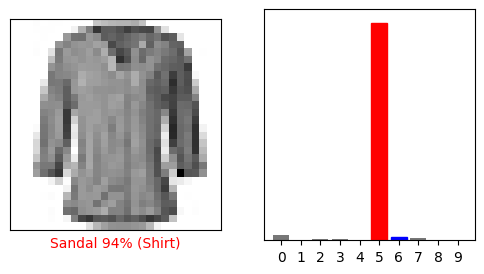

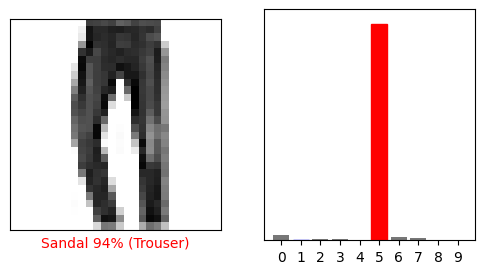

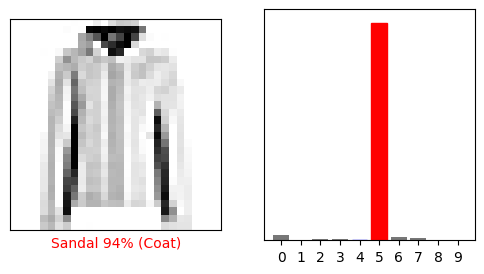

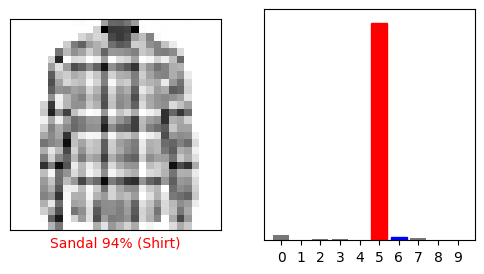

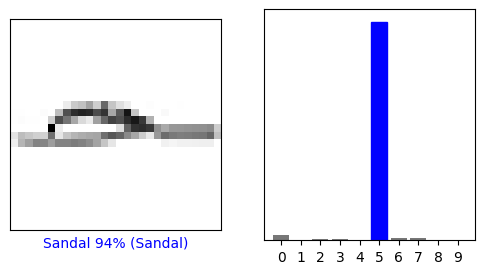

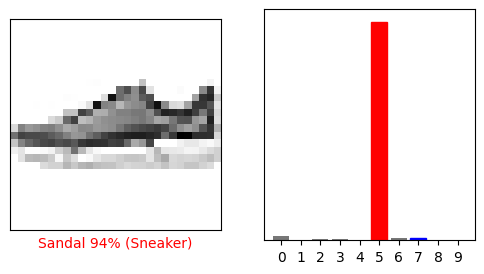

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

for i in range(10):
  plt.figure(figsize=(6, 3))
  plt.subplot(1, 2, 1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1, 2, 2)
  plot_value_array(i, predictions[i], test_labels)
  plt.show()

**Ejercicio 7**
¡¡¡¡¡¡¡¡¡
Algo tiene que haber mal porque la precisión es menor que con el anterior compilador
!!!!!!!!! A lo mejor hay que deshacer el compilador que se ha aplicado antes

In [ ]:
cadena[2].compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
cadena[2].summary()

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[3000]

print(f'\nEntrenamiento de la red neuronal 3 con adam y sparse_categorical_crossentropy\n')
cadena[2].fit(train_images, train_labels, epochs=5, batch_size=128)
test_loss, test_acc = cadena[2].evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                7850      
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Entrenamiento de la red neuronal 3 con adam y sparse_categorical_crossentropy

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 2.3297 - accuracy: 0.1135
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 2.2959 - accuracy: 0.1536
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 2.2947 - accuracy: 0.1542
Epoch 4/5
469/469 [===================